## Utilizing a LLM to interpret and describe images provided. 

This notebook is a simple example of how to use a Multimodal LLM to interpret and describe images. Intentionally added random imgas from the internet and gave them a random file name to see how the model would interpret them and not to give any hints to the model.

<div class="alert alert-block alert-info">
<b>Tip:</b> Recommend to run the code cells in order to see the output of the endpoints and understand the examples provided. 
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> All credential information and API keys are removed from the code cells and declared as environment variables for security purposes. We recommend to do the same when running the code cells if you are sharing the notebook.
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> If you plan on using this code for your own images, please make sure to select the appropriate persona, define the new image paths, and make any necessary changes to the prompt. 
</div>



## Import Libraries and Set Environment Variables 

Let's start by importing the necessary libraries and setting the environment variables.

> There will be more detail within this notebook than what is relevant to the user, but it is important to understand the different endpoints and what they represent. Also, note that the code is not being written in a production-ready manner, but rather to demonstrate the different endpoints and their outputs.

In [1]:
import json # Import the json module to work with JSON data
import requests # Import the requests library to send HTTP requests
from asksageclient import AskSageClient # Import the AskSageClient class from the asksageclient module
import pandas as pd # Import the pandas library to work with dataframes
from PIL import Image
import matplotlib.pyplot as plt
import os # Import the os module to interact with the operating system

# Function to load credentials from a JSON file
def load_credentials(filename):
    try:
        with open(filename) as file:
            return json.load(file)
    except FileNotFoundError:
        raise FileNotFoundError("The credentials file was not found.")
    except json.JSONDecodeError:
        raise ValueError("Failed to decode JSON from the credentials file.")

# Load the credentials
credentials = load_credentials('../../credentials.json')

# Extract the API key, and email from the credentials to be used in the API request
api_key = credentials['credentials']['api_key']
email = credentials['credentials']['Ask_sage_user_info']['username']


## Interact with the AskSage Python API Client

The AskSage Python API Client provides a simple way to interact with the AskSage API. The client provides methods for each endpoint, making it easy to use the API without having to deal with more time-consuming tasks like making HTTP requests and handling responses.

First order is defining the client and setting the credentials for the client, which are the email and API key.

In [2]:
"""  
class AskSageClient(
    email: email, # The email address of the user
    api_key: api_key, # The API key for the AskSage API, which can be obtained from the AskSage website
    user_base_url: str = 'https://api.asksage.ai/user', # The base URL for the user API
    server_base_url: str = 'https://api.asksage.ai/server' # The base URL for the server API
)
"""

ask_sage_client = AskSageClient(email, api_key) # Create an instance of the AskSageClient class with the email and api_key 

In [3]:
get_personas = ask_sage_client.get_personas() # Get the personas using the get_personas endpoint

## Get a dataframe with all ther personas and their respective 'ID'

# extract relevant information from the response 'id', 'name' and 'description'
def extract_personas(response):
    return [{'id': persona['id'], 'name': persona['name'], 'description': persona['description']} for persona in response['response']]

personas = extract_personas(get_personas) # Extract the personas using the extract_personas function

# Putting all information into a dataframe and set id as index
personas_df = pd.DataFrame(personas).set_index('id')

# set column width to display full content
pd.set_option('display.max_colwidth', None)

display(personas_df.head()) # remove .head() to display all personas

,name,description
id,,
1,Ask Sage,"Use this persona when you need a general-purpose AI that can handle a wide range of tasks, from translating languages to writing essays and code."
2,Legal Assistant,Use this persona when you need legal advice or information. This persona can provide accurate and helpful advice on a wide range of legal topics.
3,Contracting Officer,"Use this persona when you have questions or need advice about government contracts, Federal Acquisition Regulation (FAR) regulations, the Defense Federal Acquisition Regulation Supplement (DFARS) regulations and acquisition related questions."
4,Software Developer,"Use this persona when you need to write, review, or debug code. This persona can also provide advice on software development best practices and security standards."
5,ISSO (Cyber),Use this persona when you need advice or information about cybersecurity requirements and issues. This persona can provide accurate and helpful advice on a wide range of cybersecurity topics.


In [4]:
def query_with_file_loop(file_path):
    files = os.listdir(file_path)
    response = {}

    # First 5 images
    for file in files[:5]:
        message = f'Tell me what is in the photo provide a detailed response {file_path + file}'  # Your question/prompt
        persona = 3  # The persona you want to use, provide the ID of the persona
        model = 'gpt-4o'
        response[file] = ask_sage_client.query_with_file(message, file_path + file, persona, model)  # Query the AskSage API with the question and file
    return response

def extract_clean_message(data):
    empty_list = []
    for key, value in data.items():
        # Extract the content between 'FILE CONTENT' and 'END FILE CONTENT'
        content = value['message'].split('FILE CONTENT')[1].split('END FILE CONTENT')[0]
        # Remove 'END OF' text at the end of each content and the ':' at the beginning
        content = content.replace('END OF', '').replace(':', '')
        empty_list.append(content)

    # Create a DataFrame with the list of content
    df = pd.DataFrame(empty_list, columns=['content'])
    # Remove any '\n' in the content
    df['content'] = df['content'].str.replace('\n', '')
    # adding a space after the period to make the content more readable if there is no space
    df['content'] = df['content'].str.replace('.', '. ')
    # Add the file name to the DataFrame as index
    df.index = data.keys()
    
    return df

# Example usage
file_path =  'ex-images/' # Update with your file path
response = query_with_file_loop(file_path)
df = extract_clean_message(response)

display(df)

,content
def-456.png,"The image features an Airbus Beluga cargo plane prominently displayed on an airport tarmac. The aircraft is large and white, with a distinctive bulbous fuselage that resembles the shape of a beluga whale, which is where it gets its name. The words ""AIRBUS BELUGA"" are written on the side of the plane, and the Airbus logo is visible on the tail fin. The aircraft has a unique design tailored for transporting oversized cargo, such as aircraft parts or other large items. In the foreground, a person wearing a high-visibility vest with the Airbus logo is standing with their arm extended, pointing towards the plane. The individual appears to be wearing a dark cap and a watch on their left wrist. The vest suggests that they may be an employee or a worker at the airport. The setting is an airfield with a partly cloudy sky, and the ground is marked with tarmac lines. In the background, airport infrastructure, such as buildings and other facilities, can be seen. The overall impression is of an operational airport environment with a focus on the unique cargo aircraft."
random_photo_2.png,"The image shows a well-arranged charcuterie board with a variety of foods that are typically found in a social gathering or party setting. The board is placed on a kitchen counter with a marble-like surface. Here are the details of the items on the board- **Cheeses** There are slices of yellow cheese, possibly cheddar or a similar kind, arranged in a fan shape. - **Meats** There are two types of cured meats, one appears to be salami, sliced and fanned out, and the other could be prosciutto or another type of thinly sliced cured ham, neatly folded. - **Crackers and Breads** There are several types of crackers, including round buttery crackers, and some that appear to be seasoned or have a cheese flavor. There are also small breadsticks or pretzel sticks with festive toppings like chocolate and sprinkles, suggesting a holiday theme. - **Vegetables** Sliced cucumbers and baby carrots are present, providing a fresh and crunchy element to the board. - **Olives and Pickles** A white, clover-shaped dish holds what looks like marinated mozzarella balls, a mix of green and kalamata olives, and a red dip that could be hummus topped with red pepper sauce. - **Nuts and Dried Fruits** There are no visible nuts or dried fruits, but these are common accompaniments on such boards. - **Fresh Fruits** There are no fresh fruits visible in the image, which are often included for sweetness and color contrast. - **Condiments** Aside from the potential hummus and red pepper sauce, no other condiments are visible. - **Sweets** The festive pretzel sticks with chocolate and sprinkles add a sweet touch to the board. - **Tomatoes** There is a section with halved cherry tomatoes, adding a burst of red color and juicy flavor. The board is arranged in a way that separates each type of food, making it easy for guests to see and choose what they would like to eat. The variety of colors and textures makes the board visually appealing and appetizing."
abc-123.png,"The image shows a close-up of a deer with a focus on its head and upper body. The deer has a rich brown coat and is looking slightly to the side, giving a profile view of its face. It has large, well-developed antlers that appear to be in velvet, indicating they are still growing and have not yet calcified for the season. The antlers branch out into several tines, which are symmetrical on both sides. The deer's ears are erect and alert, and its eyes are calm and observant. The background is blurred but suggests a natural, wooded habitat with green foliage, which might indicate that the photo was taken in a forest or a similarly dense vegetative area. The lighting in the image is soft and diffused, possibly due to an overcast sky or the canopy of trees above. The overall impression is of a serene moment captured in the life of a wild deer in its natural environment."
ghi-780.png,"The image depicts a constru

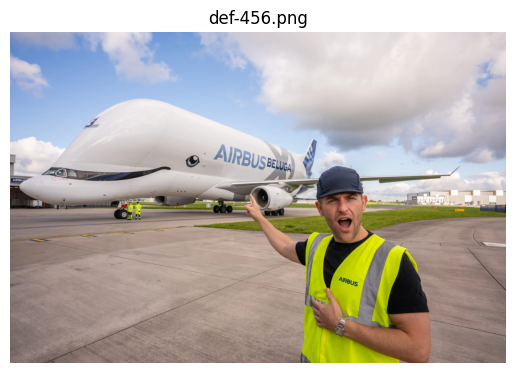

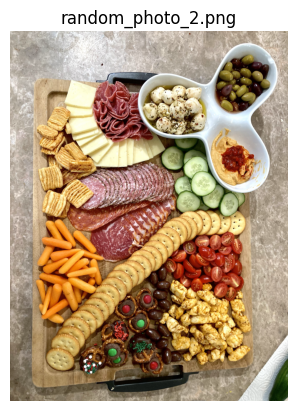

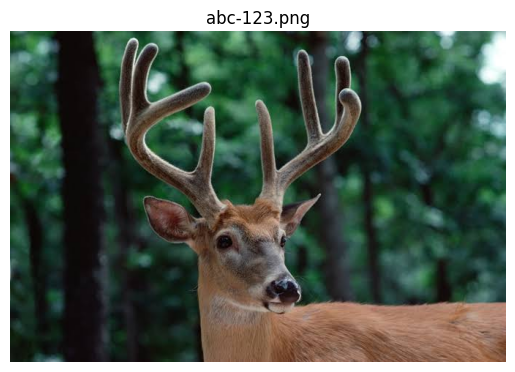

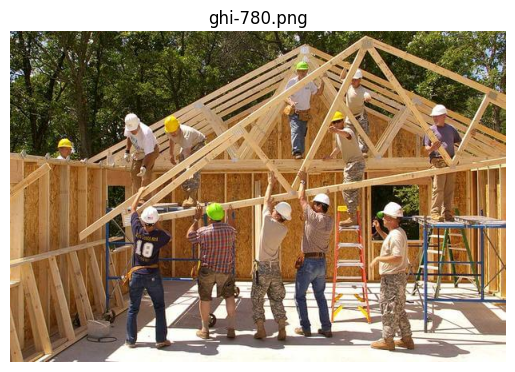

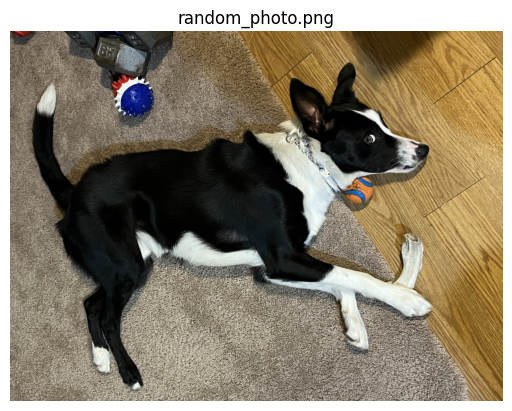

In [5]:
def render_images(file_path):
    files = os.listdir(file_path)
    for file in files[:5]:
        img = Image.open(file_path + file)
        plt.title(file)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

render_images(file_path)